In [ ]:
import pandas as pd
from collections import Counter
import re

# 讀取CSV文件
csv_path = '/Users/yautakchan/Desktop/Project/success/classified_notes_with_brands copy.csv'

# 嘗試不同的編碼讀取文件
try:
    df = pd.read_csv(csv_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding='latin1')

# 移除前調，中調，後調每一個產品中間的空格並分開
def clean_notes(notes):
    if pd.isna(notes):
        return []
    notes = re.sub(r'\s+', ' ', notes)  # 移除多餘的空格
    return [note.strip() for note in notes.split(' ') if note.strip()]

df['前調'] = df['前調'].apply(clean_notes)
df['中調'] = df['中調'].apply(clean_notes)
df['後調'] = df['後調'].apply(clean_notes)

# 將處理好的DataFrame保存為新的CSV文件
output_csv_path = '/Users/yautakchan/Desktop/Project/success/test.csv'  # 請替換為你希望保存的路徑
df.to_csv(output_csv_path, index=False, encoding='utf-8-sig')

print(f"處理好的CSV文件已保存到: {output_csv_path}")

# 計算每個調有多少種獨特的味道
unique_前調 = set(df['前調'].sum())
unique_中調 = set(df['中調'].sum())
unique_後調 = set(df['後調'].sum())

print(f'前調總共有 {len(unique_前調)} 種味道')
print(f'中調總共有 {len(unique_中調)} 種味道')
print(f'後調總共有 {len(unique_後調)} 種味道')

# 計算每一個調出現最多的頭10種味道
def top_notes(notes_series, top_n=10):
    notes = notes_series.sum()
    counter = Counter(notes)
    return counter.most_common(top_n)

top_10_前調 = top_notes(df['前調'])
top_10_中調 = top_notes(df['中調'])
top_10_後調 = top_notes(df['後調'])

print('前調最多的頭10種味道:', top_10_前調)
print('中調最多的頭10種味道:', top_10_中調)
print('後調最多的頭10種味道:', top_10_後調)

# # 可選：保存結果到文件
# with open('top_notes_results.txt', 'w') as f:
#     f.write(f'前調總共有 {len(unique_前調)} 種味道\n')
#     f.write(f'中調總共有 {len(unique_中調)} 種味道\n')
#     f.write(f'後調總共有 {len(unique_後調)} 種味道\n\n')
#     f.write('前調最多的頭10種味道:\n')
#     for note, count in top_10_前調:
#         f.write(f'{note}: {count}\n')
#     f.write('\n中調最多的頭10種味道:\n')
#     for note, count in top_10_中調:
#         f.write(f'{note}: {count}\n')
#     f.write('\n後調最多的頭10種味道:\n')
#     for note, count in top_10_後調:
#         f.write(f'{note}: {count}\n')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import matplotlib.font_manager as fm

# 獲取系統中可用字體
available_fonts = set(f.name for f in fm.fontManager.ttflist)

# 選擇支持中文的字體
fallback_fonts = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS', 'DejaVu Sans']
font_to_use = None

for font in fallback_fonts:
    if font in available_fonts:
        font_to_use = font
        break

if font_to_use is None:
    print("未找到支持中文的字體，請安裝 Microsoft JhengHei、SimHei、Arial Unicode MS 或 DejaVu Sans 字體。")
    font_to_use = 'DejaVu Sans'  # 默認值，可能不支持中文

# 設置字體
plt.rcParams['font.sans-serif'] = [font_to_use]
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 讀取CSV文件
csv_path = '/Users/yautakchan/Desktop/Project/success/classified_notes_with_brands copy.csv'

# 嘗試不同的編碼讀取文件
try:
    df = pd.read_csv(csv_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding='latin1')

# 打印出CSV文件的列名
print("CSV文件的列名: ", df.columns)

# 將列名映射到中文
df = df.rename(columns={
    'top_note': '前調',
    'heart_note': '中調',
    'base_note': '後調'
})

# 檢查一下映射後的列名
print("映射後的列名: ", df.columns)

# 移除前調，中調，後調每一個產品中間的空格並分開
def clean_notes(notes):
    if pd.isna(notes):
        return []
    notes = re.sub(r'\s+', ' ', notes)  # 移除多餘的空格
    return [note.strip() for note in notes.split(' ') if note.strip()]

df['前調'] = df['前調'].apply(clean_notes)
df['中調'] = df['中調'].apply(clean_notes)
df['後調'] = df['後調'].apply(clean_notes)

# 計算每個調出現最多的頭10種味道
def top_notes(notes_series, top_n=10):
    notes = notes_series.sum()
    counter = Counter(notes)
    return counter.most_common(top_n), counter

top_10_top_notes, top_counter_top = top_notes(df['前調'])
top_10_middle_notes, top_counter_middle = top_notes(df['中調'])
top_10_base_notes, top_counter_base = top_notes(df['後調'])

# 創建圓形圖
def plot_pie_chart(top_10_notes, total_counter, title):
    # 取出前10種味道和其計數
    labels, sizes = zip(*top_10_notes)
    other_count = sum(total_counter.values()) - sum(sizes)
    
    # 加上「其他」類別
    labels = list(labels) + ['其他']
    sizes = list(sizes) + [other_count]
    
    # 計算百分比
    total = sum(sizes)
    sizes = [s / total * 100 for s in sizes]
    
    # 繪製餅圖
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# 繪製前調、中調、後調的餅圖
plot_pie_chart(top_10_top_notes, top_counter_top, '前調的味道分布')
plot_pie_chart(top_10_middle_notes, top_counter_middle, '中調的味道分布')
plot_pie_chart(top_10_base_notes, top_counter_base, '後調的味道分布')

success


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import matplotlib.font_manager as fm

# 獲取系統中可用字體
available_fonts = set(f.name for f in fm.fontManager.ttflist)

# 選擇支持中文的字體
fallback_fonts = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS', 'DejaVu Sans']
font_to_use = None

for font in fallback_fonts:
    if font in available_fonts:
        font_to_use = font
        break

if font_to_use is None:
    print("未找到支持中文的字體，請安裝 Microsoft JhengHei、SimHei、Arial Unicode MS 或 DejaVu Sans 字體。")
    font_to_use = 'DejaVu Sans'  # 默認值，可能不支持中文

# 設置字體
plt.rcParams['font.sans-serif'] = [font_to_use]
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 讀取CSV文件
csv_path = '/Users/yautakchan/Desktop/Project/success/classified_notes_with_brands copy.csv'

# 嘗試不同的編碼讀取文件
try:
    df = pd.read_csv(csv_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding='latin1')

# 打印出CSV文件的列名
print("CSV文件的列名: ", df.columns)

# 將列名映射到中文
df = df.rename(columns={
    'top_note': '前調',
    'heart_note': '中調',
    'base_note': '後調'
})

# 檢查一下映射後的列名
print("映射後的列名: ", df.columns)

# 移除前調、中調、後調每一個產品中間的空格並分開
def clean_notes(notes):
    if pd.isna(notes):
        return []
    notes = re.sub(r'\s+', ' ', notes)  # 移除多餘的空格
    return [note.strip() for note in notes.split(' ') if note.strip()]

df['前調'] = df['前調'].apply(clean_notes)
df['中調'] = df['中調'].apply(clean_notes)
df['後調'] = df['後調'].apply(clean_notes)

# 計算每個調出現最多的頭10種味道
def top_notes(notes_series, top_n=10):
    notes = notes_series.sum()
    counter = Counter(notes)
    return counter.most_common(top_n), counter

top_10_top_notes, top_counter_top = top_notes(df['前調'])
top_10_middle_notes, top_counter_middle = top_notes(df['中調'])
top_10_base_notes, top_counter_base = top_notes(df['後調'])

# 創建圓形圖並保存圖像
def plot_pie_chart(top_10_notes, total_counter, title, filename):
    # 取出前10種味道和其計數
    labels, sizes = zip(*top_10_notes)
    other_count = sum(total_counter.values()) - sum(sizes)
    
    # 加上「其他」類別
    labels = list(labels) + ['其他']
    sizes = list(sizes) + [other_count]
    
    # 計算百分比
    total = sum(sizes)
    sizes = [s / total * 100 for s in sizes]
    
    # 繪製餅圖
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # 添加總味道數量
    plt.text(-1.4, 1.4, f'總味道數量: {len(total_counter)}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5),
             horizontalalignment='left', verticalalignment='top')

    # 保存圖像
    plt.savefig(filename, format='png')
    plt.close()

# 繪製前調、中調、後調的餅圖並保存
plot_pie_chart(top_10_top_notes, top_counter_top, '前調的味道分布', 'top_notes_distribution.png')
plot_pie_chart(top_10_middle_notes, top_counter_middle, '中調的味道分布', 'middle_notes_distribution.png')
plot_pie_chart(top_10_base_notes, top_counter_base, '後調的味道分布', 'base_notes_distribution.png')


In [ ]:
print(total_top)
print(total_middle )
print(total_base )

#價錢分佈圖

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 價錢範圍和數量數據
price_ranges = ['1-300', '301-600', '601-900', '901-1200', '1201-1500', '1501-1800', 'Other']
hktvmall_quantities = [557, 227, 141, 45, 16, 9, 7]
sasa_quantities = [342, 304, 272, 100, 20, 14, 6]
fragrance_quantities = [128, 702, 348, 131, 40, 25, 65]

# 平均價格
hktvmall_avg_price = 365
sasa_avg_price = 521
fragrance_avg_price = 698

# 設置柱狀圖的位置和寬度
x = np.arange(len(price_ranges))
width = 0.25  # 每個柱子的寬度

# 創建柱狀圖
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width, hktvmall_quantities, width, label='hktvmall', color='skyblue')
bars2 = ax.bar(x, sasa_quantities, width, label='sasa', color='lightgreen')
bars3 = ax.bar(x + width, fragrance_quantities, width, label='fragrance', color='lightcoral')

# 添加數量標籤
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

for bar in bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# 添加平均價格的虛線
ax.axhline(y=hktvmall_avg_price, color='r', linestyle='--', label=f'hktvmall 平均價格: {hktvmall_avg_price}')
ax.axhline(y=sasa_avg_price, color='b', linestyle='--', label=f'sasa 平均價格: {sasa_avg_price}')
ax.axhline(y=fragrance_avg_price, color='g', linestyle='--', label=f'fragrance 平均價格: {fragrance_avg_price}')

# 設置標題和標籤
ax.set_title('hktvmall、sasa 和 fragrance 價錢範圍的分佈')
ax.set_xlabel('價錢範圍')
ax.set_ylabel('數量')
ax.set_xticks(x)
ax.set_xticklabels(price_ranges)
ax.legend()

# 顯示圖表
plt.tight_layout()

# 保存圖表為 JPG 文件
plt.savefig('price_distribution.jpg', format='jpg', dpi=300)

# 顯示圖表
plt.show()

origin chart

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 產地和對應的數量數據
origins = [
    ('法國', 258),
    ('韓國', 93),
    ('中國', 77),
    ('義大利', 57),
    ('香港', 43),
    ('西班牙', 35),
    ('日本', 31),
    ('美國', 25),
    ('澳大利亞', 20),
    ('英國', 12),
    ('德國', 12),
    ('葡萄牙', 11),
    ('台灣', 6),
    ('加拿大', 6),
    ('英格蘭', 6),
    ('印度', 4),
    ('澳洲/比利時', 4),
    ('泰國', 4),
    ('澳大利亞/美國/意大利', 3),
    ('德國/西班牙', 3),
    ('巴基斯坦', 3),
    ('保加利亞', 3),
    ('美國/澳洲/越南/愛爾蘭', 2),
    ('德國/法國', 2),
    ('歐盟', 2),
    ('瑞士/歐盟', 1),
    ('瑞典', 1),
    ('波蘭', 1),
    ('馬其頓共和國', 1),
    ('韓國/香港', 1),
    ('Spain/France', 1),
    ('瑞士', 1),
    ('美國/香港', 1),
    ('丹麥', 1)
]

# 產品總數量
total_products = 731

# 獲取前 10 名產地數據
top_10_origins = origins[:10]

# 計算其他產地的總數量
other_count = sum(count for _, count in origins[10:])

# 添加 "其他" 類別
top_10_origins.append(('其他', other_count))

# 分離產地名稱和數量
labels, sizes = zip(*top_10_origins)

# 計算百分比
sizes = [size / total_products * 100 for size in sizes]

# 設置顏色
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

# 創建圓形圖
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# 添加產品總數量的註釋
plt.text(-1.35, 1.25, f'產品總數量: {total_products}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5), ha='center')

# 設置標題
ax.set_title('產品產地分佈')

# 保存圖表為 PNG 文件
plt.savefig('product_origin_distribution.png', format='png', dpi=300)

# 顯示圖表
plt.tight_layout()
plt.show()

brand chart

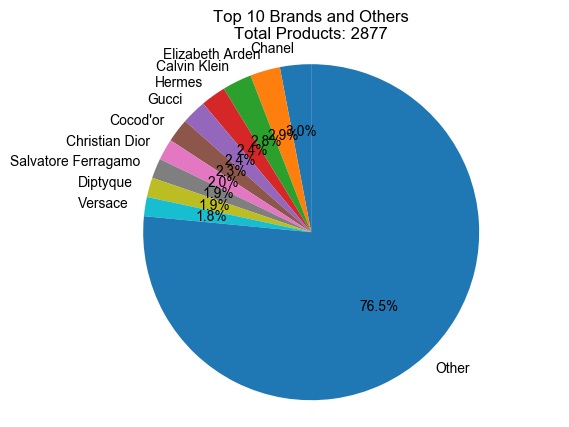

In [46]:
import matplotlib.pyplot as plt

# Data
brands = ['Chanel', 'Elizabeth Arden', 'Calvin Klein', 'Hermes', 'Gucci', 
          'Cocod\'or', 'Christian Dior', 'Salvatore Ferragamo', 'Diptyque', 'Versace', 'Other']
counts = [89, 86, 84, 72, 71, 68, 61, 57, 56, 55, 2278]  # 2278 is the sum of all others

# Total count
total_count = 2877

# Plot
fig, ax = plt.subplots()
ax.pie(counts, labels=brands, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title with total number of products
plt.title(f'Top 10 Brands and Others\nTotal Products: {total_count}')

# Save as PNG
plt.savefig('brand_distribution.png')